In [11]:
from selenium import webdriver
import requests
from lxml import etree
import pandas as pd
import numpy as np
import time
import re
import datetime as dt
import jieba
from wordcloud import WordCloud
import PIL.Image as image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from selenium import webdriver
driver= webdriver.Chrome()
driver.get('https://movie.douban.com/subject/26100958/comments?limit=20&status=P&sort=new_score')

# 获取用户信息

In [272]:
def head_x(): 
    header = {
        'Cookie':'bid=VeJ6f2DQ764; ll="118281"; __yadk_uid=ABHFHOPjqSkoqFz5hWRQ4a8MU3pxJWY0; __gads=ID=c4dbc8fb778e7187-22b4e3a3fbc4007d:T=1606986446:RT=1606986446:S=ALNI_MbvXXiiynQEJvWMII_oKBeZs0s6jg; _vwo_uuid_v2=D7BF57D592EAF0F9857E4113020D90746|3fc5702e9b0241494f5aa7ff3b07b61d; _ga=GA1.2.1854795712.1572765477; _gid=GA1.2.681890185.1627571413; __utmc=30149280; __utmc=223695111; _vwo_uuid_v2=D7BF57D592EAF0F9857E4113020D90746|3fc5702e9b0241494f5aa7ff3b07b61d; __utmz=30149280.1627636722.6.3.utmcsr=movie.douban.com|utmccn=(referral)|utmcmd=referral|utmcct=/subject/26100958/comments; __utma=30149280.1854795712.1572765477.1627636722.1627643304.7; _pk_ref.100001.4cf6=["","",1627645956,"https://m.douban.com/"]; _pk_ses.100001.4cf6=*; dbcl2="243151876:bmWneRsHbag"; ck=QkOB; __utma=223695111.1278050009.1572765477.1627643304.1627646055.7; __utmz=223695111.1627646055.7.2.utmcsr=accounts.douban.com|utmccn=(referral)|utmcmd=referral|utmcct=/; push_noty_num=0; push_doumail_num=0; __utmv=30149280.24315; __utmb=30149280.14.10.1627643304; _pk_id.100001.4cf6=b7c1fa4efeb61960.1572765477.7.1627647275.1627643304.; __utmt=1; __utmb=223695111.4.10.1627646055; ap_v=0,6.0'
    ,'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'
    }
    return header

def get_data(k): #获取数据
    data = []
    for i in range(1,25): #-24
        url = 'https://movie.douban.com/subject/26100958/comments?percent_type={}&start={}&limit=20&status=P&sort=new_score'.format(k,(i-1)*20) #
        print('爬取{}第{}页评论的用户信息'.format(k,i))
        rq = requests.get(url,headers=head_x())
        html_1 = etree.HTML(rq.content)
        name=html_1.xpath('//*[@class="comment-info"]/a/text()')#用户名 
        u_links=html_1.xpath('//*[@class="comment-info"]/a/@href')#用户主页
        star_time=html_1.xpath('//*[@class="comment-info"]/span/@title')#单数是评价 双数是时间
        comment=html_1.xpath('//*[@class="comment"]/p/span/text()') #评价
        print(u_links)
        for j in range(20):#进到用户主页
            print('第{}页，第{}个用户'.format(i,j))
            item = {}
            u_link=u_links[j]
            rqqq = requests.get(u_link,headers=head_x())
            html = etree.HTML(rqqq.content)
            state=html.xpath('//*[@class="basic-info"]/text()') #区分注销用户
            if state==[]: 
                continue
            city=html.xpath('//*[@class="user-info"]/a/text()')
            if city ==[]:
                item['city']=None
            else:
                item['city'] = html.xpath('//*[@class="user-info"]/a/text()')[0]
            item['reg_date'] = re.sub('加入','',html.xpath('//*[@class="user-info"]/div/text()')[1])
            item['name']=name[j]
            item['star']=star_time[2*j]
            item['v_time']=star_time[2*(j+1)-1]
            item['comment']=comment[j]
            item['level']=k
            data.append(item)
            time.sleep(0.2)
    return data
    

In [274]:
# data_h=get_data('h')
# df_h=pd.DataFrame(data=data_h)
# df_h.to_csv('D:/gyt的D盘文件夹/暑假项目二/好评用户.csv',index=False,encoding = "utf_8_sig")
# data_m=get_data('m')
# df_m=pd.DataFrame(data=data_m)
# df_m.to_csv('D:/gyt的D盘文件夹/暑假项目二/中评用户.csv',index=False,encoding = "utf_8_sig")
data_l=get_data('l')
df_l=pd.DataFrame(data=data_l)
df_l.to_csv('D:/gyt的D盘文件夹/暑假项目二/差评用户.csv',index=False,encoding = "utf_8_sig")

爬取l第1页评论的用户信息
['https://www.douban.com/people/70121595/', 'https://www.douban.com/people/195423617/', 'https://www.douban.com/people/yellowmoonbird/', 'https://www.douban.com/people/185771115/', 'https://www.douban.com/people/166146504/', 'https://www.douban.com/people/secretjinzhengu/', 'https://www.douban.com/people/49129482/', 'https://www.douban.com/people/43666383/', 'https://www.douban.com/people/80722428/', 'https://www.douban.com/people/wuwu-WU/', 'https://www.douban.com/people/33650664/', 'https://www.douban.com/people/66645706/', 'https://www.douban.com/people/39781506/', 'https://www.douban.com/people/thomasneeson/', 'https://www.douban.com/people/Athenalotr/', 'https://www.douban.com/people/raquelycidas/', 'https://www.douban.com/people/achering/', 'https://www.douban.com/people/189266064/', 'https://www.douban.com/people/51763291/', 'https://www.douban.com/people/63189858/']
第1页，第0个用户
第1页，第1个用户
第1页，第2个用户
第1页，第3个用户
第1页，第4个用户
第1页，第5个用户
第1页，第6个用户
第1页，第7个用户
第1页，第8个用户
第1页，第9个用户

第8页，第1个用户
第8页，第2个用户
第8页，第3个用户
第8页，第4个用户
第8页，第5个用户
第8页，第6个用户
第8页，第7个用户
第8页，第8个用户
第8页，第9个用户
第8页，第10个用户
第8页，第11个用户
第8页，第12个用户
第8页，第13个用户
第8页，第14个用户
第8页，第15个用户
第8页，第16个用户
第8页，第17个用户
第8页，第18个用户
第8页，第19个用户
爬取l第9页评论的用户信息
['https://www.douban.com/people/185655184/', 'https://www.douban.com/people/129184789/', 'https://www.douban.com/people/166983692/', 'https://www.douban.com/people/59744816/', 'https://www.douban.com/people/122730413/', 'https://www.douban.com/people/45578730/', 'https://www.douban.com/people/heidyxu/', 'https://www.douban.com/people/batongyang/', 'https://www.douban.com/people/2946082/', 'https://www.douban.com/people/185439726/', 'https://www.douban.com/people/FreshSherlock/', 'https://www.douban.com/people/160003491/', 'https://www.douban.com/people/90619513/', 'https://www.douban.com/people/104598774/', 'https://www.douban.com/people/161940393/', 'https://www.douban.com/people/175175527/', 'https://www.douban.com/people/115848628/', 'https://www.douban.com/people/17400996

第16页，第1个用户
第16页，第2个用户
第16页，第3个用户
第16页，第4个用户
第16页，第5个用户
第16页，第6个用户
第16页，第7个用户
第16页，第8个用户
第16页，第9个用户
第16页，第10个用户
第16页，第11个用户
第16页，第12个用户
第16页，第13个用户
第16页，第14个用户
第16页，第15个用户
第16页，第16个用户
第16页，第17个用户
第16页，第18个用户
第16页，第19个用户
爬取l第17页评论的用户信息
['https://www.douban.com/people/30441221/', 'https://www.douban.com/people/rayfun/', 'https://www.douban.com/people/100841432/', 'https://www.douban.com/people/115703155/', 'https://www.douban.com/people/138836095/', 'https://www.douban.com/people/62478064/', 'https://www.douban.com/people/47552912/', 'https://www.douban.com/people/AnastasiaM/', 'https://www.douban.com/people/11941550/', 'https://www.douban.com/people/w2jmoe/', 'https://www.douban.com/people/roiroii/', 'https://www.douban.com/people/ecnumeng/', 'https://www.douban.com/people/1888516/', 'https://www.douban.com/people/138613913/', 'https://www.douban.com/people/philharmoniker/', 'https://www.douban.com/people/ingrida/', 'https://www.douban.com/people/karylee/', 'https://www.douban.com/people

第24页，第1个用户
第24页，第2个用户
第24页，第3个用户
第24页，第4个用户
第24页，第5个用户
第24页，第6个用户
第24页，第7个用户
第24页，第8个用户
第24页，第9个用户
第24页，第10个用户
第24页，第11个用户
第24页，第12个用户
第24页，第13个用户
第24页，第14个用户
第24页，第15个用户
第24页，第16个用户
第24页，第17个用户
第24页，第18个用户
第24页，第19个用户


In [3]:
#读数据
df_l=pd.read_csv('D:/gyt的D盘文件夹/暑假项目二/差评用户.csv')
df_h=pd.read_csv('D:/gyt的D盘文件夹/暑假项目二/好评用户.csv')
df_m=pd.read_csv('D:/gyt的D盘文件夹/暑假项目二/中评用户.csv')

In [4]:
df=pd.concat([df_h,df_l,df_m],ignore_index=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   city      1222 non-null   object
 1   reg_date  1410 non-null   object
 2   name      1410 non-null   object
 3   star      1410 non-null   object
 4   v_time    1410 non-null   object
 5   comment   1410 non-null   object
 6   level     1410 non-null   object
dtypes: object(7)
memory usage: 77.2+ KB


,city,reg_date,name,star,v_time,comment,level
0,山西太原,2016-06-08,棠枫海,力荐,2019/4/24 2:23,如果你不喜欢这部电影，说明他不是为你准备的，故事的终章是为读过故事的人准备的,h
1,北京,2017-07-21,Tel,推荐,2019/4/24 0:11,我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕...,h
2,重庆,2012-08-07,朝暮雪,力荐,2019/4/24 0:01,托尼说好要回归家庭、陪伴家人，可最终还是选择了重出江湖，因为责任和使命，因为“我是钢铁侠”。...,h
3,重庆,2015-02-27,Rafe,力荐,2019/4/24 3:05,钢铁侠成为了美队，美队活成了钢铁侠。,h
4,上海,2011-03-10,KarSa,力荐,2019/4/24 4:52,谁能想到是一只老鼠拯救了地球呢？,h
...,...,...,...,...,...,...,...
1405,"London, United Kingdom",2012-07-30,上善若水,还行,2019/5/17 22:44,己亥34。想象力丰富+视觉效果很好。情节不傻逼，表演不出戏。很好的商业片。,m
1406,中国香港,2008-07-17,小柚子×旅行家,还行,2019/9/11 22:17,在飞机上看睡着了3还是4次。回忆杀还是有点感人，但是电影太长了让人很疲惫,m
1407,"Ghazzah, Palestinian Territories",2007-04-14,烧炭小五郎,还行,2019/5/7 0:33,剧情真的一言难尽,m
1408,北京,2009-08-02,灼灼裴质,还行,2019/5/6 16:43,我的尼尼,m


In [5]:
df=pd.concat([df_h,df_l,df_m],ignore_index=True)
#转为时间格式
df['reg_date']=pd.to_datetime(df['reg_date'],format="%Y-%m-%d")
df['v_time']=pd.to_datetime(df['v_time'],format="%Y-%m-%d %H:%M:%S")#这个有两个空格
#转为数字分数
df['star']=df['star'].replace(['力荐','推荐','还行','较差','很差'],[5,4,3,2,1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   city      1222 non-null   object        
 1   reg_date  1410 non-null   datetime64[ns]
 2   name      1410 non-null   object        
 3   star      1410 non-null   int64         
 4   v_time    1410 non-null   datetime64[ns]
 5   comment   1410 non-null   object        
 6   level     1410 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 77.2+ KB


In [6]:
tmpdf=pd.read_csv('D:/gyt的D盘文件夹/暑假项目二/stoplist.txt',names=['w'],sep='aaa',encoding='utf-8')
df['cut']=0
for i in range(len(df['comment'])):
    words=jieba.cut(df['comment'][i])
    df['cut'][i]=[w for w in words if w not in list(tmpdf.w)]

C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
Building prefix dict from the default dictionary ...
Loading model from cache C:\WINDOWS\Temp\jieba.cache
Loading model cost 0.583 seconds.
Prefix dict has been built successfully.
C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\86136\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [9]:
mywordList=[]
for i in df.cut:
    mywordList.append(i)
wordList=[x for item in mywordList for x in item]
wordList=[w for w in wordList if w not in [' ','\n']]#再去一下
comment=' '.join(wordList)

In [21]:
#词频统计
counts=pd.DataFrame(data=wordList).value_counts()
pd.DataFrame(data=counts,columns=['频次']).head(50)

,频次
0,
更少,1
更换,1
更有意义,1
更有甚者,1
更足,1
書,1
曾經,1
替换成,1
最令,1


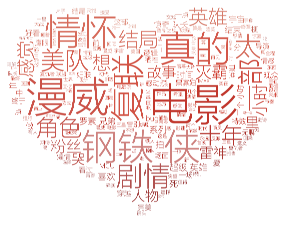

In [12]:
import matplotlib.colors as colors
from wordcloud import WordCloud, ImageColorGenerator
mask = np.array(image.open('D:/gyt的D盘文件夹/暑假项目二/aixin (1).jpg'))
wc=WordCloud(font_path='msyhl.ttc',background_color='white',mask=mask,
             prefer_horizontal=0.9999,
             scale=10
            ).generate(comment)
image_produce = wc.to_image()
image_colors = ImageColorGenerator(mask)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
wc.to_file('D:/gyt的D盘文件夹/暑假项目二/词云.png')

# 绘制不同评价的词云

In [ ]:
def draw_cw(level):
    #准备文本
    L_1=[]
    for i in df[df['level']==level].cut:
        L_1.append(i)
        L_2=[x for item in L_1 for x in item]
        L_2=[w for w in L_2 if w not in [' ','\n']]#再去一下
        com=' '.join(L_2)
    #开始画
    mask = np.array(image.open('D:/gyt的D盘文件夹/暑假项目二/aixin (1).jpg'))
    wc=WordCloud(font_path='msyhl.ttc',background_color='white',mask=mask,
                 prefer_horizontal=0.9999,
                 scale=10
                ).generate(com)
    image_produce = wordcloud.to_image()
    image_colors = ImageColorGenerator(mask)
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    wc.to_file('D:/gyt的D盘文件夹/暑假项目二/{}词云.png'.format(level))
    
    
draw_cw('l')
draw_cw('m')
draw_cw('h')

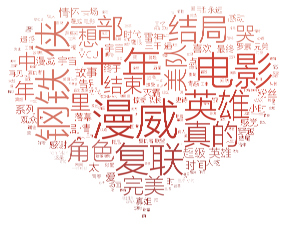

# 时间分析

## 4.1 数量随日期的变化

In [16]:
df

,city,reg_date,name,star,v_time,comment,level,cut,age
0,山西太原,2016-06-08,棠枫海,5,2019-04-24 02:23:00,如果你不喜欢这部电影，说明他不是为你准备的，故事的终章是为读过故事的人准备的,h,"[喜欢, 这部, 电影, 故事, 终章, 读过, 故事]",3
1,北京,2017-07-21,Tel,4,2019-04-24 00:11:00,我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕...,h,"[90, 羡慕, 一代人, 40, 年前, 观众, 影院, 里, 星战, 正传, 三部曲, ...",2
2,重庆,2012-08-07,朝暮雪,5,2019-04-24 00:01:00,托尼说好要回归家庭、陪伴家人，可最终还是选择了重出江湖，因为责任和使命，因为“我是钢铁侠”。...,h,"[托尼, 说好, 回归, 家庭, 陪伴, 家人, 最终, 选择, 重出江湖, 责任, 使命,...",7
3,重庆,2015-02-27,Rafe,5,2019-04-24 03:05:00,钢铁侠成为了美队，美队活成了钢铁侠。,h,"[钢铁, 侠, 美队, 美队, 活成, 钢铁, 侠]",4
4,上海,2011-03-10,KarSa,5,2019-04-24 04:52:00,谁能想到是一只老鼠拯救了地球呢？,h,"[想到, 一只, 老鼠, 拯救, 地球]",8
...,...,...,...,...,...,...,...,...,...
1405,"London, United Kingdom",2012-07-30,上善若水,3,2019-05-17 22:44:00,己亥34。想象力丰富+视觉效果很好。情节不傻逼，表演不出戏。很好的商业片。,m,"[己亥, 34, 想象力, 视觉效果, 情节, 傻, 逼, 表演, 不出, 戏, 商业片]",7
1406,中国香港,2008-07-17,小柚子×旅行家,3,2019-09-11 22:17:00,在飞机上看睡着了3还是4次。回忆杀还是有点感人，但是电影太长了让人很疲惫,m,"[飞机, 睡着, 次, 回忆, 杀, 感人, 电影, 太长, 疲惫]",11
1407,"Ghazzah, Palestinian Territories",2007-04-14,烧炭小五郎,3,2019-05-07 00:33:00,剧情真的一言难尽,m,"[剧情, 真的, 一言难尽]",12
1408,北京,2009-08-02,灼灼裴质,3,2019-05-06 16:43:00,我的尼尼,m,[尼尼],10


C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


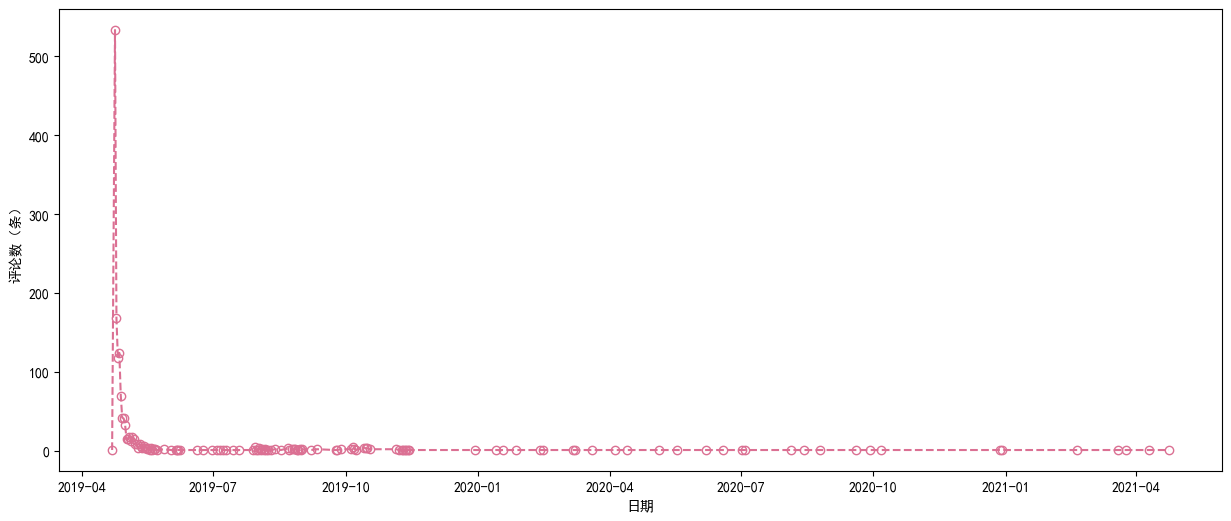

In [170]:
df['com_date']=df['v_time'].dt.date
data1=df.groupby('com_date').size()
plt.style.use('default')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(15,6))
plt.plot(data1,Linestyle='--',color='palevioletred',label='评论数',marker='o',markerfacecolor='none')
plt.xlabel('日期')
plt.ylabel('评论数（条）')
plt.savefig('D:/gyt的D盘文件夹/暑假项目二/评论数日期.png',bbox_inches = 'tight',dpi=600)

C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


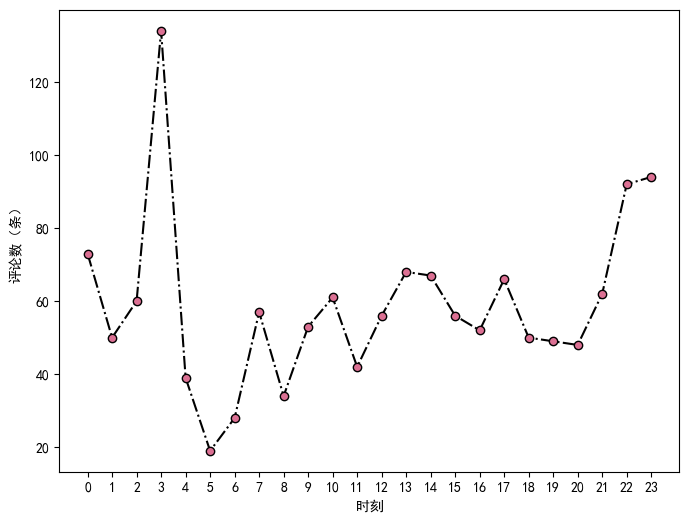

In [171]:
df['hour']=df['v_time'].dt.hour
data2=df.groupby('hour').size()
plt.figure(figsize=(8,6))
plt.plot(data2,Linestyle='-.',color='k',label='评论数',marker='o',markerfacecolor='palevioletred')
plt.xlabel('时刻')
plt.ylabel('评论数（条）')
plt.xticks(np.arange(0, 24,1))
plt.savefig('D:/gyt的D盘文件夹/暑假项目二/评论hour.png',bbox_inches = 'tight',dpi=600)

## 4.3 随日期变化，评分变化情况 

C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


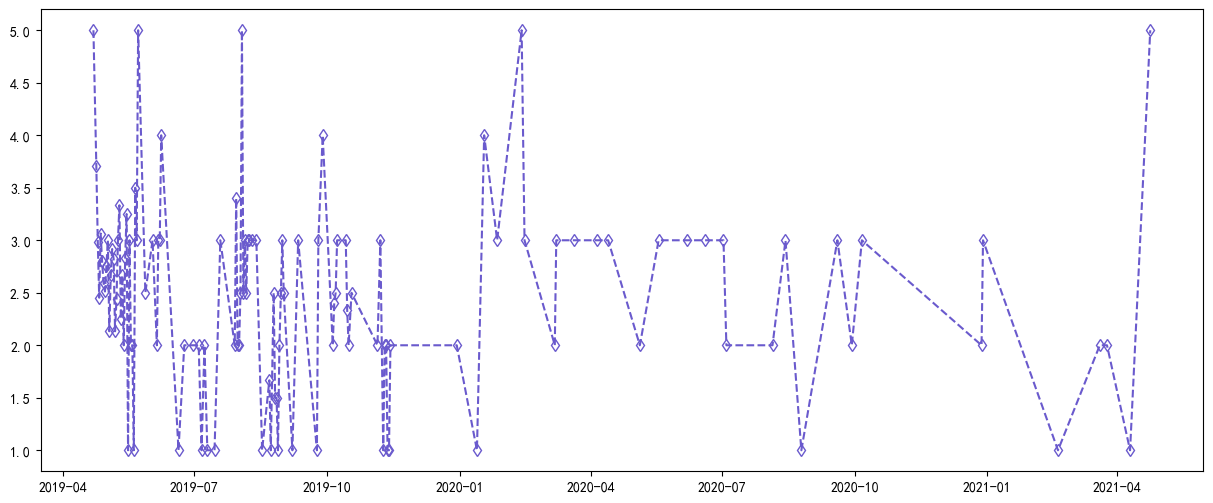

In [172]:
data3=df.groupby('com_date').mean()['star']
plt.figure(figsize=(15,6))
plt.plot(data3,Linestyle='--',color='slateblue',label='评论数',marker='d',markerfacecolor='none')
plt.savefig('D:/gyt的D盘文件夹/暑假项目二/star_time_mean.png',bbox_inches = 'tight',dpi=600)

# 5 城市分析

In [167]:
df.isnull().sum()

city        188
reg_date      0
name          0
star          0
v_time        0
comment       0
level         0
cut           0
com_date      0
hour          0
dtype: int64

In [174]:
df_1=df.dropna(axis=0,how='any')
a=df_1.city.value_counts()
# plt.savefig('D:/gyt的D盘文件夹/暑假项目二/评论数日期.png',bbox_inches = 'tight',dpi=600)
aa=pd.DataFrame(data=a)
aa.to_csv('D:/gyt的D盘文件夹/暑假项目二/城市counts.csv',index=False,encoding = "utf_8_sig")

In [185]:
wc=WordCloud(font_path='msyhl.ttc',background_color='white', collocations=False, height=400, # 高度设置为400
                          width=600, # 宽度设置为800
                          scale=10# 长宽拉伸程度设置为20
                          )# colormap ="winter",,max_font_size=150,min_font_size=10prefer_horizontal=0.9999
# df_32=pd.DataFrame(df[df['地点']==dd].groupby('商品').size())
name=aa.index
val=aa['city'].values
dic=dict(zip(name,val))
wc.generate_from_frequencies(dic)
plt.imshow(wc)
plt.axis("off")

In [216]:
from pyecharts.charts import WordCloud
name=np.array(aa.index)
val=(aa['city'].values)/len(aa.city)
# wd = pd.read_csv(file_name, encoding = 'gbk')
# wd['销量'] = wd['销量']/len(wd)
word = [(i, j) for i,j in zip(name, val)]
wordCloud = WordCloud()
wordCloud.add("", word, word_size_range=[10, 120])
wordCloud.render("D:/gyt的D盘文件夹/暑假项目二/城市.html")
# wordCloud.render('word_{}.html'.format(label))

'D:\\gyt的D盘文件夹\\暑假项目二\\城市.html'

In [289]:
from pyecharts.charts import Map
vall=aa['city'].values
city = [(i, j) for i,j in zip(s, vall)]
# province_distribution = {'河南': 45.23, '北京': 37.56, '河北': 21, '辽宁': 12, '江西': 6, '上海': 20, '安徽': 10, '江苏': 16, '湖南': 9,'浙江': 13, '海南': 2, '广东': 22, '湖北': 8, '黑龙江': 11, '澳门': 1, '陕西': 11, '四川': 7, '内蒙古': 3, '重庆': 3,'云南': 6, '贵州': 2, '吉林': 3, '山西': 12, '山东': 11, '福建': 4, '青海': 1, '天津': 1,'其他': 1}
# provice = list(province_distribution.keys())
# values = list(province_distribution.values())
map1 = Map()#width=1200,,  height=600"中国地图", '中国地图'
# add("商家A", [list(z) for z in zip(Faker.provinces, Faker.values())], "china")
map1.add("评论数",[list(z) for z in zip(s, list(vall))][:10],maptype='china')#, visual_range=[0, 50], maptype='china'is_visualmap=True,visual_text_color='#000'
map1.set_global_opts(
        title_opts=opts.TitleOpts(title="Map-VisualMap（分段型）"),
        visualmap_opts=opts.VisualMapOpts(max_=200, is_piecewise=True),
    )
map1.render(path="D:/gyt的D盘文件夹/暑假项目二/中国地图.html")

'D:\\gyt的D盘文件夹\\暑假项目二\\中国.csv'

In [327]:
from pyecharts.charts import Map
vall=aa['city'].values
city = [(i, j) for i,j in zip(s, vall)]
s=[]
for i in name:
    s.append(i[0:2])
    print(i[0:2])
aa['p']=s
aa.to_csv("D:/gyt的D盘文件夹/暑假项目二/中国.csv",encoding = "utf_8_sig")
ww=[list(z) for z in zip(s, list(vall))]
list11=[['北京', 271], ['上海', 162], ['广东', 56], ['四川', 42], ['广东', 41], ['浙江', 35], ['湖北', 30], ['重庆', 26], ['江苏', 24], ['陕西', 16], ['河南', 12], ['中国', 12], ['湖南', 11], ['天津', 11], ['山东', 11], ['Sa', 10], ['Ne', 10], ['云南', 10], ['Lo', 10], ['福建', 9], ['辽宁', 9], ['Pa', 9], ['浙江', 9], ['江苏', 8], ['吉林', 8], ['安徽', 8], ['山东', 7], ['黑龙江', 7], ['Tō', 7], ['Me', 6], ['Re', 6], ['Sy', 6], ['辽宁', 6], ['福建', 5], ['江苏', 5], ["P'", 5], ['Lo', 5], ['Fi', 4], ['浙江', 4], ['To', 4], ['山西', 4], ['福建', 4], ['Be', 4], ['江西', 4], ['浙江', 4], ['Kā', 4], ['中国', 4], ['广西', 4], ['Am', 3], ['Sa', 3], ['He', 3], ['Ch', 3], ['Gr', 3], ['贵州', 3], ['Si', 3], ['Bo', 3], ['广东', 3], ['Ch', 3], ['广东', 3], ['湖南', 3], ['河南', 3], ['浙江', 2], ['Yu', 2], ['Os', 2], ['Al', 2], ['Fi', 2], ['福建', 2], ['We', 2], ['江苏', 2], ['Ma', 2], ['浙江', 2], ['An', 2], ['Ly', 2], ['Au', 2], ['Se', 2], ['广西', 2], ['云南', 2], ['广东', 2], ['江西', 2], ['江苏', 2], ['Zü', 2], ['Ph', 2], ['Pe', 2], ['宁夏', 2], ['Wa', 2], ['江苏', 2], ['内蒙古', 2], ['中国', 2], ['江苏', 2], ['新疆', 2], ['浙江', 2], ['云南', 1], ['Eu', 1], ['Is', 1], ['Ky', 1], ['福建', 1], ['Pr', 1], ['Bu', 1], ['广西', 1], ['Ci', 1], ['清迈', 1], ['浙江', 1], ['Si', 1], ['广东', 1], ['Ka', 1], ['Kø', 1], ['Mü', 1], ['湖南', 1], ['中国', 1], ['吉林', 1], ['河南', 1], ['Ba', 1], ['Ma', 1], ['广东', 1], ['Co', 1], ['广西', 1], ['Be', 1], ['江苏', 1], ['简阳', 1], ['黑龙江', 1], ['昆山', 1], ['Du', 1], ['Co', 1], ['四川', 1], ['安徽', 1], ['Bu', 1], ['Tr', 1], ['山东', 1], ['内蒙古', 1], ['江西', 1], ['Ka', 1], ['甘肃', 1], ['Sa', 1], ['Al', 1], ['四川', 1], ['山西', 1], ['Mu', 1], ['Je', 1], ['Ha', 1], ['Ge', 1], ['辽宁', 1], ['Ot', 1], ['四川', 1], ['Ex', 1], ['江苏', 1], ['Is', 1], ['Ed', 1], ['Va', 1], ['辽宁', 1], ['广东', 1], ['Mu', 1], ['Bu', 1], ['湖南', 1], ['内蒙古', 1], ['Sh', 1], ['江苏', 1], ['Mi', 1], ['新疆', 1], ['广东', 1], ['江西', 1], ['江苏', 1], ['安徽', 1], ['Ja', 1], ['安徽', 1], ['广东', 1], ['Mi', 1], ['河北', 1], ['An', 1], ['Be', 1], ['Lu', 1], ['Te', 1], ['Ca', 1], ['Gu', 1], ['Ci', 1], ['乐清', 1], ['Ar', 1], ['At', 1], ['广东', 1], ['Gh', 1], ['福建', 1], ['新疆', 1], ['山东', 1], ['Al', 1], ['河南', 1], ['宁国', 1], ['安徽', 1], ['Ku', 1], ['安徽', 1], ['湖北', 1], ['河南', 1], ['Sl', 1], ['安徽', 1], ['江西', 1], ['Tu', 1], ['甘肃', 1], ['河北', 1], ['吉林', 1], ['湖南', 1], ['新疆', 1], ['Aa', 1], ['Yo', 1], ['Do', 1], ['辽宁', 1], ['Wi', 1], ['Wa', 1], ['Fr', 1], ['广东', 1], ['La', 1], ['Al', 1], ['浙江', 1], ['Ka', 1], ['Ma', 1], ['西藏', 1], ['Li', 1], ['To', 1], ['湖北', 1], ['St', 1], ['Vā', 1], ['Ei', 1], ['湖南', 1], ['Ro', 1], ['河北', 1], ['Ba', 1], ['Se', 1], ['Jy', 1], ['No', 1], ['Na', 1], ['湖南', 1], ['Ha', 1], ['Ch', 1], ['Ra', 1], ['Tū', 1], ['山东', 1], ['Pe', 1], ['四川', 1], ['云南', 1], ['Gr', 1], ['Ba', 1], ['Ma', 1], ['江西', 1], ['Ox', 1], ['Cu', 1], ['青海', 1], ['江西', 1], ['河北', 1]]

c = (
    Map()
    .add("",list11, "china",map_value_calculation="sum",is_map_symbol_show=False)
    .set_global_opts(
    
        visualmap_opts=opts.VisualMapOpts(max_=300, is_piecewise=True),
    )
    .render("map_visualmap_piecewise.html")
)

[['北京', 271], ['上海', 162], ['广东', 56], ['四川', 42], ['广东', 41], ['浙江', 35], ['湖北', 30], ['重庆', 26], ['江苏', 24], ['陕西', 16], ['河南', 12], ['中国', 12], ['湖南', 11], ['天津', 11], ['山东', 11], ['Sa', 10], ['Ne', 10], ['云南', 10], ['Lo', 10], ['福建', 9], ['辽宁', 9], ['Pa', 9], ['浙江', 9], ['江苏', 8], ['吉林', 8], ['安徽', 8], ['山东', 7], ['黑龙', 7], ['Tō', 7], ['Me', 6], ['Re', 6], ['Sy', 6], ['辽宁', 6], ['福建', 5], ['江苏', 5], ["P'", 5], ['Lo', 5], ['Fi', 4], ['浙江', 4], ['To', 4], ['山西', 4], ['福建', 4], ['Be', 4], ['江西', 4], ['浙江', 4], ['Kā', 4], ['中国', 4], ['广西', 4], ['Am', 3], ['Sa', 3], ['He', 3], ['Ch', 3], ['Gr', 3], ['贵州', 3], ['Si', 3], ['Bo', 3], ['广东', 3], ['Ch', 3], ['广东', 3], ['湖南', 3], ['河南', 3], ['浙江', 2], ['Yu', 2], ['Os', 2], ['Al', 2], ['Fi', 2], ['福建', 2], ['We', 2], ['江苏', 2], ['Ma', 2], ['浙江', 2], ['An', 2], ['Ly', 2], ['Au', 2], ['Se', 2], ['广西', 2], ['云南', 2], ['广东', 2], ['江西', 2], ['江苏', 2], ['Zü', 2], ['Ph', 2], ['Pe', 2], ['宁夏', 2], ['Wa', 2], ['江苏', 2], ['内蒙', 2], ['中国', 2], ['江苏', 2],

## 不同城市评分情况

In [351]:
gb=df_1.groupby('city')
lis=list(gb.size()[gb.size()>20].index)#['star'].sort_values(ascending=False)
gb.mean().loc[lis].to_csv("D:/gyt的D盘文件夹/暑假项目二/不同城市评分情况.csv",encoding = "utf_8_sig")
pp=gb.mean().loc[lis]['star']
pp.index=['上海', '北京', '四川', '广东', '广东', '江苏', '浙江', '湖北', '重庆']
c = (
    Map()
    .add("",[list(z) for z in zip(pp.index, pp.values)], "china",map_value_calculation="sum",is_map_symbol_show=False)
    .set_global_opts(
    
        visualmap_opts=opts.VisualMapOpts(max_=5, is_piecewise=True),
    )
    .render("D:/gyt的D盘文件夹/暑假项目二/地图.html"))

# 用户会龄分析

Text(0, 0.5, '人数')

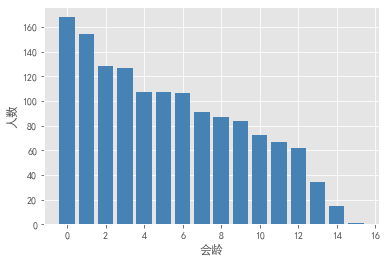

In [13]:
df['age']=df['v_time'].dt.year-df['reg_date'].dt.year
a=2021-df['reg_date'].dt.year
count=df['age'].value_counts()
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.bar(x=range(len(count)),height=count,color='steelblue')
plt.xlabel('会龄')
plt.ylabel('人数')


In [401]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<BarContainer object of 16 artists>

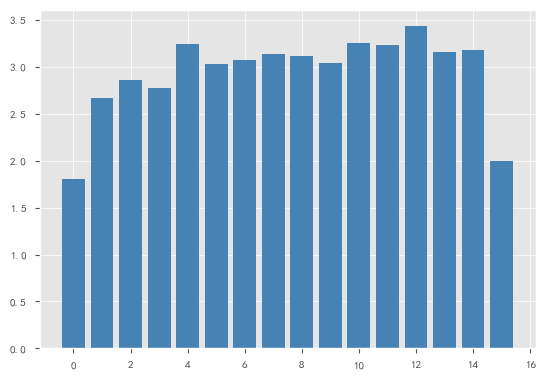

In [413]:
y=df.groupby('age').mean()['star'].values
x=df.groupby('age').mean()['star'].index
plt.bar(x,y,color='steelblue')

In [15]:
df[['age','star']].corr()


,age,star
age,1.000000,0.122587
star,0.122587,1.000000


<BarContainer object of 16 artists>

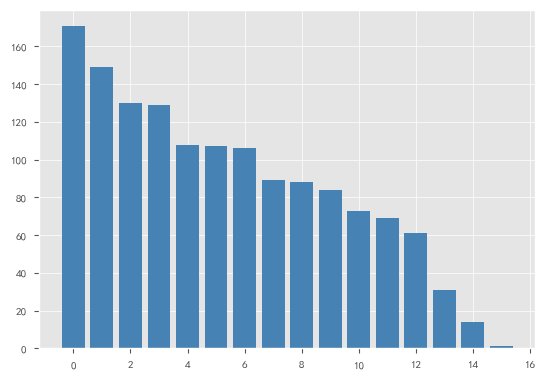

In [434]:
plt.bar(x=range(len(a.value_counts())),height=a.value_counts(),color='steelblue')

11    171
12    149
13    130
10    129
15    108
9     107
14    106
6      89
5      88
4      84
8      73
3      69
7      61
16     31
2      14
1       1
Name: reg_date, dtype: int64